<h1>ECON 428 PSET 9<h1>
<h3>Mark Viti and Marcus Lisman<h3>

# 1

#### Part 1: Derivation of $\frac{\partial h^l}{\partial b^l}$

In this part, we need to show that:
$$
\frac{\partial h^l}{\partial b^l} = (f^l)'(W^lh^{l-1} + b^l)
$$

To begin, let's recall the general form for a layer in a neural network:
$$
h^l = f^l(W^lh^{l-1} + b^l)
$$
where:
- $h^l$ is the output of the $l$-th layer,
- $f^l$ is the activation function of the $l$-th layer,
- $W^l$ is the weight matrix connecting layer $l-1$ to layer $l$,
- $b^l$ is the bias vector for layer $l$.

Given this setup, $h^l$ is a function of $W^l$, $h^{l-1}$, and $b^l$. To find $\frac{\partial h^l}{\partial b^l}$, we use the fact that the only term in the expression $W^lh^{l-1} + b^l$ that directly depends on $b^l$ is $b^l$ itself. Hence, using the chain rule, we get:
$$
\frac{\partial h^l}{\partial b^l} = \frac{\partial f^l}{\partial (W^lh^{l-1} + b^l)} \cdot \frac{\partial (W^lh^{l-1} + b^l)}{\partial b^l}
$$
The derivative of $f^l$ with respect to its input is $(f^l)'(W^lh^{l-1} + b^l)$, and the derivative of $W^lh^{l-1} + b^l$ with respect to $b^l$ is 1 since $W^lh^{l-1}$ is constant with respect to $b^l$. This simplifies to:
$$
\frac{\partial h^l}{\partial b^l} = (f^l)'(W^lh^{l-1} + b^l)
$$

#### Part 2: Computation of $\frac{\partial L}{\partial b^l}$ Using Backpropagation

To find $\frac{\partial L}{\partial b^l}$ where $L$ is the loss function, we again utilize the chain rule. In backpropagation, we often propagate gradients backward from the output towards the input. Using the chain rule:
$$
\frac{\partial L}{\partial b^l} = \frac{\partial L}{\partial h^l} \cdot \frac{\partial h^l}{\partial b^l}
$$
From part 1, we know that $\frac{\partial h^l}{\partial b^l} = (f^l)'(W^lh^{l-1} + b^l)$. To express $\frac{\partial L}{\partial h^l}$ in a form suitable for backpropagation, note that:
$$
\frac{\partial L}{\partial h^l} = \sum_k \frac{\partial L}{\partial h^{l+1}_k} \cdot \frac{\partial h^{l+1}_k}{\partial h^l}
$$
where the summation is over all units $k$ in layer $l+1$. This expression can be thought of as the "backpropagated error" from layer $l+1$ to layer $l$. The term $\frac{\partial h^{l+1}_k}{\partial h^l}$ can be derived similarly by considering the impact of each unit in layer $l$ on each unit in layer $l+1$.

In practice, the computation of $\frac{\partial L}{\partial b^l}$ during backpropagation involves:
1. Calculating the gradient of the loss with respect to the outputs of layer $l$ (i.e., $ \frac{\partial L}{\partial h^l}$).
2. Multiplying this by the gradient of the outputs of layer $l$ with respect to the biases of layer $l$ (i.e., $(f^l)'(W^lh^{l-1} + b^l)$).

This results in an efficient way to compute gradients layer-by-layer.

# 2

Part 1

In [1]:
import numpy as np
import pandas as pd

data_path = 'data.csv'
data = pd.read_csv(data_path)

def mse_loss(y_true, y_pred, theta, lambda_reg):
    """
    Calculate the MSE loss with L2 regularization.
    
    Parameters:
        y_true (np.array): Actual values.
        y_pred (np.array): Predicted values.
        theta (np.array): Model parameters.
        lambda_reg (float): Regularization strength.
        
    Returns:
        float: MSE loss with L2 penalty.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    l2_penalty = lambda_reg * np.sum(theta ** 2)
    return mse + l2_penalty

def cross_entropy_loss(y_true, y_pred, theta, lambda_reg):
    """
    Calculate the Cross-Entropy loss with L2 regularization.
    
    Parameters:
        y_true (np.array): Actual values (binary labels).
        y_pred (np.array): Predicted probabilities.
        theta (np.array): Model parameters.
        lambda_reg (float): Regularization strength.
        
    Returns:
        float: Cross-Entropy loss with L2 penalty.
    """
    # Avoid division by zero and log of zero by clipping values
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    cross_entropy = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    l2_penalty = lambda_reg * np.sum(theta ** 2)
    return cross_entropy + l2_penalty

def derivative_mse(y_true, y_pred):
    """
    Derivative of MSE loss with respect to predictions.
    
    Parameters:
        y_true (np.array): Actual values.
        y_pred (np.array): Predicted values.
        
    Returns:
        np.array: Derivative of MSE.
    """
    return 2 * (y_pred - y_true)

def derivative_cross_entropy(y_true, y_pred):
    """
    Derivative of Cross-Entropy loss with respect to predictions.
    
    Parameters:
        y_true (np.array): Actual values (binary labels).
        y_pred (np.array): Predicted probabilities.
        
    Returns:
        np.array: Derivative of Cross-Entropy.
    """
    # Avoid division by zero and log of zero by clipping values
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    return (y_pred - y_true) / (y_pred * (1 - y_pred))

y_true = data['y'].values
y_pred = np.random.random(size=len(data))  
theta = np.random.random(size=5)  
lambda_reg = 0.01  

mse_loss_value = mse_loss(y_true, y_pred, theta, lambda_reg)
cross_entropy_loss_value = cross_entropy_loss(y_true, y_pred, theta, lambda_reg)

mse_derivative = derivative_mse(y_true, y_pred)
cross_entropy_derivative = derivative_cross_entropy(y_true, y_pred)

print("MSE Loss Value:", mse_loss_value)
print("Cross Entropy Loss Value:", cross_entropy_loss_value)
print("MSE derivative:", mse_derivative[:5])
print("Cross Entropy Derivative:", cross_entropy_derivative[:5])

MSE Loss Value: 0.3527978310881952
Cross Entropy Loss Value: 1.012665137333519
MSE derivative: [-0.58423111 -1.89012529 -1.43482626  1.27781608 -0.19932746]
Cross Entropy Derivative: [ -1.41265995 -18.20255115  -3.5387348    2.76937765  -1.11069612]


Part 2

In [2]:
import numpy as np

data_path_reloaded = 'data.csv'
data_reloaded = pd.read_csv(data_path_reloaded)

def sigmoid(x):
    """ Sigmoid activation function. """
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
    """ Derivative of the sigmoid function. """
    sig = sigmoid(x)
    return sig * (1 - sig)

def relu(x):
    """ ReLU activation function. """
    return np.maximum(0, x)

def derivative_relu(x):
    """ Derivative of the ReLU function. """
    return (x > 0).astype(float)

features = data_reloaded[['x1', 'x2', 'x3', 'x4', 'x5']].values

sigmoid_values = sigmoid(features)
relu_values = relu(features)

sigmoid_derivatives = derivative_sigmoid(features)
relu_derivatives = derivative_relu(features)

print("Sigmoid Values:", sigmoid_values)
print("ReLu Values:", relu_values)
print("Sigmoid Derivative Values:", sigmoid_derivatives)
print("ReLu Derivative Values:", relu_derivatives)

Sigmoid Values: [[0.71655596 0.84853901 0.73976027 0.75567192 0.67431597]
 [0.6328661  0.53219916 0.37372385 0.48488821 0.45987194]
 [0.76741011 0.68166821 0.63514845 0.80159893 0.65398492]
 ...
 [0.29676822 0.26650994 0.25711134 0.23311642 0.21822044]
 [0.71180585 0.62386037 0.57355384 0.66554611 0.55629567]
 [0.70673125 0.402548   0.52776813 0.45632282 0.3512221 ]]
ReLu Values: [[0.92744164 1.72318792 1.04472291 1.1290954  0.72777112]
 [0.54453225 0.12897515 0.         0.         0.        ]
 [1.1937446  0.76144884 0.55436818 1.39631779 0.63660195]
 ...
 [0.         0.         0.         0.         0.        ]
 [0.90417082 0.50596617 0.29636569 0.68810888 0.22614153]
 [0.87956102 0.         0.11118692 0.         0.        ]]
Sigmoid Derivative Values: [[0.20310352 0.12852056 0.19251501 0.18463187 0.21961394]
 [0.2323466  0.24896321 0.23405433 0.24977163 0.24838974]
 [0.17849183 0.21699666 0.2317349  0.15903809 0.22628864]
 ...
 [0.20869684 0.19548239 0.1910051  0.17877315 0.17060028]

Part 3

(a)

In [3]:
import numpy as np
import pandas as pd

def load_layer_data(path):
    data = pd.read_csv(path)
    weights = data.iloc[:, :-1].values.T
    biases = data.iloc[:, -1].values
    return weights, biases

class neural_net:
    def __init__(self, layers_config, activation_funcs):
        self.layers = layers_config
        self.activations = activation_funcs
        self.activations_funcs = {
            "ReLU": (lambda x: np.maximum(0, x), lambda x: (x > 0).astype(float)),
            "sigmoid": (lambda x: 1 / (1 + np.exp(-x)), lambda x: x * (1 - x))
        }

    def forward(self, x):
        self.cache = {'A': [x]}  # Cache to store layer inputs, activations, and linear transforms
        A = x
        for i, (weights, biases) in enumerate(self.layers):
            Z = np.dot(A, weights) + biases
            activation_func = self.activations_funcs[self.activations[i]][0]
            A = activation_func(Z)
            self.cache['A'].append(A)
        return A

    def backward(self, y_true, output, loss_type='mse'):
        derivatives = []
        error = output - y_true if loss_type == 'mse' else (output - y_true) / (output * (1 - output))
        
        for i in reversed(range(len(self.layers))):
            A_prev = self.cache['A'][i]
            dA = error * self.activations_funcs[self.activations[i]][1](self.cache['A'][i+1])
            dW = np.dot(A_prev.T, dA) / A_prev.shape[0]
            dB = np.sum(dA, axis=0) / A_prev.shape[0]
            derivatives.insert(0, (dW, dB))
            if i > 0:  # Propagate error backward
                error = np.dot(dA, self.layers[i][0].T)
        
        return derivatives

data_path = 'data.csv'
data = pd.read_csv(data_path)
x_sample = data.drop('y', axis=1).values  
y_sample = data['y'].values.reshape(-1, 1)  

layers_config = [load_layer_data(f'layer{i+1}.csv') for i in range(5)]
activations = ["ReLU", "sigmoid", "ReLU", "sigmoid", "ReLU"]

network = neural_net(layers_config, activations)

output = network.forward(x_sample)

derivatives = network.backward(y_sample, output, 'mse')

for i, (dW, dB) in enumerate(derivatives):
    print(f"Layer {i+1} - Weights Gradient:\n{dW}\nBiases Gradient:\n{dB}\n")



Layer 1 - Weights Gradient:
[[-2.45168344e-07 -6.86940689e-07  3.72276653e-10  1.58705359e-06
   1.16713690e-07]
 [-6.69223131e-07 -7.39021710e-07  6.25554916e-08  1.09194465e-06
   8.05035987e-09]
 [ 4.64984202e-07 -3.87214691e-07 -1.14390639e-08  6.66634559e-07
   1.02333169e-07]
 [ 6.37024868e-07 -1.03860797e-06  4.16636682e-08  9.83492984e-07
   2.10121638e-07]
 [ 1.06710208e-06 -1.57054225e-06  7.23470489e-08  4.10993109e-07
   2.65212679e-07]]
Biases Gradient:
[ 2.19892270e-06 -2.34835484e-06  5.94817403e-08  1.06963767e-06
  6.10146820e-07]

Layer 2 - Weights Gradient:
[[ 1.71334173e-06  5.00164780e-07 -1.99821881e-07 -6.54347607e-07]
 [ 1.03741317e-06  3.02694863e-07 -1.20948699e-07 -3.95900405e-07]
 [ 7.10238723e-09  2.07183277e-09 -8.27869258e-10 -2.71047982e-09]
 [ 9.61271975e-07  2.80546719e-07 -1.12094287e-07 -3.66621832e-07]
 [ 2.61776071e-06  7.64001885e-07 -3.05245255e-07 -9.99357800e-07]]
Biases Gradient:
[ 2.79413030e-05  8.15376389e-06 -3.25785431e-06 -1.06643937e-05

(b)

In [4]:
import numpy as np
import pandas as pd

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x) 

def load_layer_data(file_path):
    data = pd.read_csv(file_path)
    weights = data.iloc[:, :-1].values.T
    biases = data.iloc[:, -1].values
    return weights, biases

class neural_net:
    def __init__(self, nh, activations, layer_files):
        self.nh = nh
        self.activations = activations
        self.layers = []
        for i in range(len(nh)):
            weights, biases = load_layer_data(layer_files[i])
            self.layers.append((weights, biases))
        self.activations_funcs = {'ReLU': (relu, relu_derivative), 'sigmoid': (sigmoid, sigmoid_derivative)}

    def forward(self, x):
        self.cache = {'A': [x]}  # Cache to store inputs and activations
        for i, (weights, biases) in enumerate(self.layers):
            z = np.dot(self.cache['A'][-1], weights) + biases
            A = self.activations_funcs[self.activations[i]][0](z)
            self.cache['A'].append(A)
        return self.cache['A'][-1]

    def backward(self, y_true, loss_type='mse'):
        A_final = self.cache['A'][-1]
        error = (A_final - y_true) * (1 if loss_type == 'mse' else A_final * (1 - A_final))
        
        gradients = []
        
        for i in reversed(range(len(self.layers))):
            weights, biases = self.layers[i]
            A_prev = self.cache['A'][i]
            dZ = error * self.activations_funcs[self.activations[i]][1](self.cache['A'][i+1])
            dW = np.dot(A_prev.T, dZ) / len(A_prev)
            dB = np.sum(dZ, axis=0) / len(A_prev)
            gradients.insert(0, (dW, dB))
            if i > 0:  # Backpropagate the error
                error = np.dot(dZ, weights.T)
        
        return gradients

layer_files = ['layer1.csv', 'layer2.csv', 'layer3.csv', 'layer4.csv', 'layer5.csv']
activations = ["ReLU", "sigmoid", "ReLU", "sigmoid", "ReLU"]
nh = [5, 4, 3, 5, 1]

network = neural_net(nh, activations, layer_files)

x_input = np.array([[0.1, -0.2, 0.3, -0.4, 0.5]])

y_target = np.array([[3]])

output = network.forward(x_input)

mse_gradients = network.backward(y_target, 'mse')
cross_entropy_gradients = network.backward(y_target, 'cross_entropy')

print("MSE Gradients (First Hidden Layer): Weights\n", mse_gradients[0][0])
print("MSE Gradients (First Hidden Layer): Biases\n", mse_gradients[0][1])
print("Cross-Entropy Gradients (First Hidden Layer): Weights\n", cross_entropy_gradients[0][0])
print("Cross-Entropy Gradients (First Hidden Layer): Biases\n", cross_entropy_gradients[0][1])

MSE Gradients (First Hidden Layer): Weights
 [[ 4.47227732e-06 -4.90277833e-06  0.00000000e+00  0.00000000e+00
   9.10898171e-07]
 [-8.94455463e-06  9.80555665e-06 -0.00000000e+00 -0.00000000e+00
  -1.82179634e-06]
 [ 1.34168319e-05 -1.47083350e-05  0.00000000e+00  0.00000000e+00
   2.73269451e-06]
 [-1.78891093e-05  1.96111133e-05 -0.00000000e+00 -0.00000000e+00
  -3.64359268e-06]
 [ 2.23613866e-05 -2.45138916e-05  0.00000000e+00  0.00000000e+00
   4.55449085e-06]]
MSE Gradients (First Hidden Layer): Biases
 [ 4.47227732e-05 -4.90277833e-05  0.00000000e+00  0.00000000e+00
  9.10898171e-06]
Cross-Entropy Gradients (First Hidden Layer): Weights
 [[ 9.40423940e-07 -1.03094906e-06  0.00000000e+00  0.00000000e+00
   1.91542336e-07]
 [-1.88084788e-06  2.06189813e-06 -0.00000000e+00 -0.00000000e+00
  -3.83084673e-07]
 [ 2.82127182e-06 -3.09284719e-06  0.00000000e+00  0.00000000e+00
   5.74627009e-07]
 [-3.76169576e-06  4.12379625e-06 -0.00000000e+00 -0.00000000e+00
  -7.66169346e-07]
 [ 4.70

Part 4

(a)

Early stopping is a form of regularization used to avoid overfitting when training a machine learning model, particularly in the context of iterative methods such gradient descent. The idea behind early stopping is where we monitor the model's performance on a validation set during the training process and then stop training when the model's performance on the validation set starts to degrade, even if the performance on the training set continues to improve.

This is considered a form of "free lunch" in machine learning because it effectively helps in preventing overfitting without the need to explicitly alter the model's complexity, such as by adding regularization terms. The model is trained just enough to learn the underlying patterns but not too much that it starts to learn the noise in the training data, which we wants to prevent. By using a portion of the data as a validation set, early stopping also leverages this data for tuning the number of training epochs, thus optimizing both the model's capacity and its generalization to new data.

(b)

In [5]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def sgd_with_early_stopping(func, grad, data, batch_size, initial_params, patience):
    train_data, temp_data = train_test_split(data, test_size=0.5, random_state=42)
    valid_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

    train_x = train_data.drop('y', axis=1).values
    train_y = train_data['y'].values
    valid_x = valid_data.drop('y', axis=1).values
    valid_y = valid_data['y'].values

    params = np.array(initial_params, dtype=float)
    best_validation_error = np.inf
    best_params = None
    patience_counter = 0

    while patience_counter < patience:
        indices = np.arange(train_x.shape[0])
        np.random.shuffle(indices)
        train_x = train_x[indices]
        train_y = train_y[indices]

        for start in range(0, len(train_x), batch_size):
            end = min(start + batch_size, len(train_x))
            x_batch = train_x[start:end]
            y_batch = train_y[start:end]
            params -= 0.01 * grad(params, x_batch, y_batch)  # Update with gradient

        validation_error = func(params, valid_x, valid_y)
        if validation_error < best_validation_error:
            best_validation_error = validation_error
            best_params = params.copy()
            patience_counter = 0 
        else:
            patience_counter += 1  

    return best_params

def loss_function(params, x, y):
    predictions = x.dot(params)
    return np.mean((predictions - y) ** 2)

def gradient_function(params, x, y):
    predictions = x.dot(params)
    return 2 * x.T.dot(predictions - y) / len(y)

data = pd.read_csv('data.csv')
initial_params = [0.01] * (data.shape[1])  

data['Intercept'] = 1
features = ['Intercept'] + [col for col in data if col != 'y' and col != 'Intercept']

initial_params = np.random.randn(len(features))

best_params = sgd_with_early_stopping(loss_function, gradient_function, data[features + ['y']], 32, initial_params, 10)
print("Best Parameters:", best_params)

Best Parameters: [ 0.52451775 -0.01202861 -0.01776294 -0.00377832  0.09739284 -0.01652387]


Part 5

(a)

Selecting appropriate initial values for the weights and biases in a neural network is crucial for effective training. The choice of these initial values can significantly impact the speed of convergence during training as well as the ability of the network to reach a good generalization performance. Here are some considerations to take into account:

- Avoid Symmetry Breaking: If all weights are initialized to the same value (such as zero), each neuron in a layer will learn the same features during training, which is ineffective. Random initialization helps break symmetry and ensures neurons can learn different functions.

- Control Variance: The initial weights should be set so that the variance of the outputs from each layer is neither too high nor too low. Too high a variance can lead to exploding gradients, while too low a variance can cause vanishing gradients, especially with deep networks.

# Activation Function Compatibility:

ReLU (Rectified Linear Unit): Weights for layers using ReLU activation should be initialized in a way that reduces the likelihood of dead neurons (neurons that only output zero). A popular method is the He initialization, which sets the weights with variance scaled according to the number of incoming nodes, improving the flow of gradients.
Sigmoid/Tanh: For these activations, it's vital to maintain a small range of variance at initialization to prevent saturation. Xavier/Glorot initialization is commonly used, where weights are initialized based on the number of input and output nodes to keep the variance stable across layers.
Bias Initialization: Biases can generally be initialized to zero since the asymmetry breaking is primarily handled by the random weights. However, sometimes setting them to a small constant value like 0.01 can prevent neurons from being dead at the start, especially for ReLU activations.

# Example of Good Initial Values for the Given Network Structure:
Given the network structure from Problem Set 8 with nl = 5, nh = (5, 4, 3, 5, 1), and various activations (ReLU and sigmoid), we can choose appropriate initialization methods:

For layers with ReLU activation, use He initialization:
$$
\text{Var}(W) = \frac{2}{\text{number of input nodes}}
$$

For layers with sigmoid activation, use Xavier/Glorot initialization:
$$
\text{Var}(W) = \frac{1}{\text{average of input and output nodes}}
$$


In [6]:
import numpy as np

def initialize_parameters(layer_dims, activations):
    np.random.seed(42) 
    parameters = {}
    L = len(layer_dims) 

    for l in range(1, L):
        if activations[l-1] == 'ReLU':
            std_dev = np.sqrt(2. / layer_dims[l-1]) 
        elif activations[l-1] == 'sigmoid':
            std_dev = np.sqrt(1. / (layer_dims[l-1] + layer_dims[l]))  
        
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * std_dev
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

layer_dims = [5, 4, 3, 5, 1]  
activations = ['ReLU', 'sigmoid', 'ReLU', 'sigmoid', 'ReLU']

parameters = initialize_parameters(layer_dims, activations)

for key, value in parameters.items():
    print(f"{key}: shape {value.shape}, first entry {value.flat[0]}")


W1: shape (4, 5), first entry 0.31414961391137586
b1: shape (4, 1), first entry 0.0
W2: shape (3, 4), first entry 0.5539631645620577
b2: shape (3, 1), first entry 0.0
W3: shape (5, 3), first entry -0.01102043785053617
b3: shape (5, 1), first entry 0.0
W4: shape (1, 5), first entry 0.4315683416652254
b4: shape (1, 1), first entry 0.0


Part 6

We would normalize the data for neural networks for the following reasons:

1. **Faster Convergence**: Normalizing the data (for example, scaling input features to have zero mean and unit variance) helps in speeding up the learning process. It ensures that the gradient descent algorithm, which is often used for training neural networks, converges faster.

2. **Balanced Feature Influence**: When features are on different scales, larger-scale features might dominate the learning process, potentially leading to a model that does not appropriately learn from other features. Normalization mitigates this risk by ensuring all features contribute equally to the model's learning.

3. **Improved Numeric Stability**: Many activation functions used in neural networks, like the sigmoid or tanh, are sensitive to very large or very small inputs (leading to issues like vanishing or exploding gradients). Normalizing inputs helps avoid such extremes, maintaining numerical stability.

Regarding penalization, which is typically implemented in the form of regularization (like L1, L2 regularization), the primary considerations are:

1. **Weights Penalization**:
   - Typically, only weights are penalized, not biases. Penalizing weights helps prevent overfitting by discouraging large weights, thus simplifying the model. A smaller weight magnitude generally leads to a smoother model where the output changes more slowly with changes in input, enhancing the model's generalization capabilities. The rationale behind this is that weights in a neural network control the magnitude of the contribution of inputs and the activation of neurons. Large weights can lead to a model that is overly complex and sensitive to small changes in input (high variance), capturing noise rather than the underlying data pattern.

2. **Bias Penalization**:
   - Bias terms are usually not penalized. This is because biases merely shift the activation function to the left or right, which helps the model fit better with less dependency on the specific distribution and scale of the inputs. Penalizing biases can unnecessarily restrict the model’s flexibility to fit the data, especially if the data itself is not centered or standardized.

Therefore, for neural networks, we think it is generally better to penalize only the weights to maintain the model's capacity to adapt its learning to the data's mean structure while avoiding overfitting. Penalizing weights typically involves techniques like L2 regularization (Ridge), which adds a penalty equal to the square of the magnitude of coefficients.

We believe that normalizing input data and selectively applying penalization to weights but not to biases provides a balanced approach to designing neural networks that are both robust and capable of generalizing well from training data to unseen data.


Part 7
We are stealing a lot of our code from PSET 8

## Part A
We start with the smallest lambda value and increase it by a factor of 10 until we reach the largest lambda value. This is because we want to find the optimal lambda value that minimizes the validation error. By starting with a small lambda value, we can observe the effect of regularization on the model's performance and gradually increase it to see how the model responds to different levels of regularization. This approach allows us to identify the lambda value that provides the best trade-off between bias and variance, leading to a model that generalizes well to unseen data.

In [7]:
import numpy as np
import pandas as pd

def sigmoid(x):
    # More stable sigmoid to prevent overflow
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(output):
    return output * (1 - output)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

class NeuralNetwork:
    def __init__(self, layer_sizes, activation_funcs, loss_func='mse'):
        self.layer_sizes = layer_sizes
        self.activation_funcs = activation_funcs
        self.weights = []
        self.biases = []
        self.loss_func = loss_func

        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) / np.sqrt(layer_sizes[i]))
            self.biases.append(np.zeros(layer_sizes[i + 1]))

    def feedforward(self, x):
        self.activations = [x]
        for i in range(len(self.weights)):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            if self.activation_funcs[i] == 'sigmoid':
                activation = sigmoid(z)
            elif self.activation_funcs[i] == 'relu':
                activation = relu(z)
            else:
                raise ValueError("Unsupported activation function")
            self.activations.append(activation)
        return self.activations[-1]

    def backprop(self, x, y, learning_rate, lambda_val):
        output = self.feedforward(x)
        if self.loss_func == 'mse':
            error = y - output
            loss_derivative = -2 * error
        elif self.loss_func == 'cross_entropy':
            loss_derivative = -(y / output - (1 - y) / (1 - output))
        else:
            raise ValueError("Unsupported loss function")

        errors = [loss_derivative]

        for i in reversed(range(len(self.weights))):
            if self.activation_funcs[i] == 'sigmoid':
                delta = errors[-1] * sigmoid_derivative(self.activations[i + 1])
            else:
                delta = errors[-1] * relu_derivative(self.activations[i + 1])
            errors.append(delta.dot(self.weights[i].T))
            
            weight_gradient = self.activations[i].T.dot(delta) + lambda_val * self.weights[i]
            norm = np.linalg.norm(weight_gradient)
            clip_threshold = 100.0  # Adjust threshold as needed
            if norm > clip_threshold:
                weight_gradient = weight_gradient * clip_threshold / norm

            bias_gradient = np.sum(delta, axis=0)
            
            bias_norm = np.linalg.norm(bias_gradient)
            if bias_norm > clip_threshold:
                bias_gradient = bias_gradient * clip_threshold / bias_norm

            self.weights[i] -= learning_rate * weight_gradient
            self.biases[i] -= learning_rate * bias_gradient

        errors.reverse()

    def train(self, x, y, learning_rate=0.01, epochs=1000, lambda_val=0.1):
        for epoch in range(epochs):
            self.backprop(x, y, learning_rate, lambda_val)

layer_sizes = [5, 4, 3, 5, 1]

activation_funcs = ['relu', 'sigmoid', 'relu', 'sigmoid']
model = NeuralNetwork(layer_sizes, activation_funcs, loss_func='mse')

data = pd.read_csv('data.csv')
X = np.array(data[['x1', 'x2', 'x3', 'x4', 'x5']])
Y = np.array(data[['y']])

lambdas = [1, 10, 100, 1000, 10000]
best_lambda = None
best_error = float('inf')

split_index = int(0.8 * len(X))
X_train, X_val = X[:split_index], X[split_index:]
Y_train, Y_val = Y[:split_index], Y[split_index:]

for lambda_val in lambdas:
    model = NeuralNetwork(layer_sizes, activation_funcs, loss_func='mse')
    model.train(X_train, Y_train, learning_rate=0.1, epochs=1000, lambda_val=lambda_val)
    val_predictions = model.feedforward(X_val)
    val_error = np.mean((Y_val - val_predictions) ** 2) 
    print(f'Validation MSE with λ={lambda_val}: {val_error}')

    if val_error < best_error:
        best_error = val_error
        best_lambda = lambda_val

print(f'Best λ: {best_lambda} with MSE: {best_error}')

final_model = NeuralNetwork(layer_sizes, activation_funcs, loss_func='mse')
final_model.train(X, Y, learning_rate=0.1, epochs=1000, lambda_val=best_lambda)

Validation MSE with λ=1: 0.5219999997040675
Validation MSE with λ=10: 0.47748389829599264
Validation MSE with λ=100: 0.5219999999998356
Validation MSE with λ=1000: 0.5219999787621635
Validation MSE with λ=10000: 0.521999999129633
Best λ: 10 with MSE: 0.47748389829599264


### C

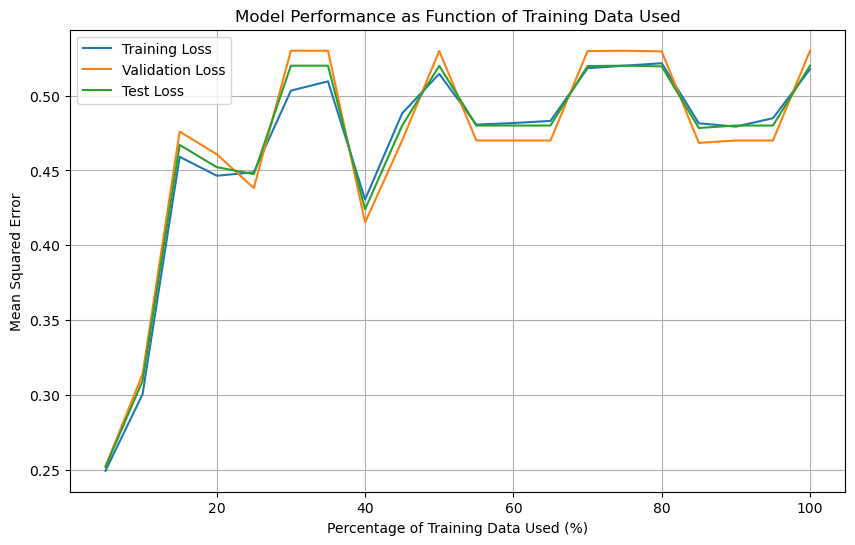

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load and prepare data
data = pd.read_csv('data.csv')
X = np.array(data[['x1', 'x2', 'x3', 'x4', 'x5']])
Y = np.array(data[['y']])

X_train_full, X_test, Y_train_full, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_full, Y_train_full, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

model = NeuralNetwork(layer_sizes, activation_funcs, loss_func='mse')

def incremental_training_test(X_train, Y_train, X_val, Y_val, X_test, Y_test):
    training_losses = []
    validation_losses = []
    test_losses = []
    increments = np.arange(0.05, 1.05, 0.05)

    for inc in increments:
        idx = int(len(X_train) * inc)
        model = NeuralNetwork(layer_sizes, activation_funcs, loss_func='mse')  # Reinitialize the model
        model.train(X_train[:idx], Y_train[:idx], learning_rate=0.1, epochs=1000, lambda_val=best_lambda)
        
        train_loss = np.mean((Y_train[:idx] - model.feedforward(X_train[:idx])) ** 2)
        val_loss = np.mean((Y_val - model.feedforward(X_val)) ** 2)
        test_loss = np.mean((Y_test - model.feedforward(X_test)) ** 2)

        training_losses.append(train_loss)
        validation_losses.append(val_loss)
        test_losses.append(test_loss)

    plt.figure(figsize=(10, 6))
    plt.plot(increments * 100, training_losses, label='Training Loss')
    plt.plot(increments * 100, validation_losses, label='Validation Loss')
    plt.plot(increments * 100, test_losses, label='Test Loss')
    plt.xlabel('Percentage of Training Data Used (%)')
    plt.ylabel('Mean Squared Error')
    plt.title('Model Performance as Function of Training Data Used')
    plt.legend()
    plt.grid(True)
    plt.show()

incremental_training_test(X_train, Y_train, X_val, Y_val, X_test, Y_test)


More data is basically always a good thing, particularly when the data is colleted in an unbiased fashion. That said, all the data in the world will not help if our model is not sufficiently complicated to model the underlying data generating process. Therefore the tradeoff between increasing the number of layers, increasingly the number of nodes in each layer, and increasing the amount of data is a complex one. Gathering more data is generally a good idea, but it could be expensive or slow down a project depending on the underlying data set. Increasing the number of layers and nodes in each layer can help the model better fit the data, but it can also lead to overfitting. Specifically, increasing the depth of the network can help the model learn more complex data patterns by leveraging hierarchical representations. Wider networks can learn many features simultaneously, potentially improving the model's ability to capture complex relationships in the data. However, increasing the number of layers and nodes also increases the risk of overfitting, as the model may start to learn noise in the training data. Therefore, the best approach is to start with a simple model and increase the complexity as needed. This is where the validation set comes in. By monitoring the model's performance on the validation set, we can determine when the model is overfitting and adjust the complexity accordingly. This is where early stopping can be useful.

### D

The core idea is that our training, test, and validation sets need to be taken from the same data generating process and randomly separated. Assuming that we are adjusting our model architecture appropriately once we add the new data, this would not result in any bias. However, if we choose a model architecture based on the first pool of data and then add in more data later, even if we randomly split our data into training, test, and validation sets, we could introduce bias. This is because the model architecture was chosen based on the first pool of data, and the new data may not be well-suited to that architecture. Specifically, now that we have more data we know more about the data generating process. So, basing our architecture off of an incorrect perception of that process will cause there to be error. 